**A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain.** **Please plot the**
**amplitude part of the spectral components and observe it.**

In [16]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("statement.mp3")

fft_data = np.fft.fft(signal)
amplitude = np.abs(fft_data)

frequencies = np.fft.fftfreq(len(signal), d=1/sr)

print("FFT DATA:\n",fft_data)
print("Amplitude:\n",amplitude)
print("Frequencies:\n",frequencies)


FFT DATA:
 [-4.02805941+0.j          5.86633583+0.90028512j -1.96989945+1.52038987j
 ... -0.38423239-0.70002362j -1.96989945-1.52038987j
  5.86633583-0.90028512j]
Amplitude:
 [4.02805941 5.93501553 2.48839088 ... 0.79854092 2.48839088 5.93501553]
Frequencies:
 [ 0.          0.30864198  0.61728395 ... -0.92592593 -0.61728395
 -0.30864198]


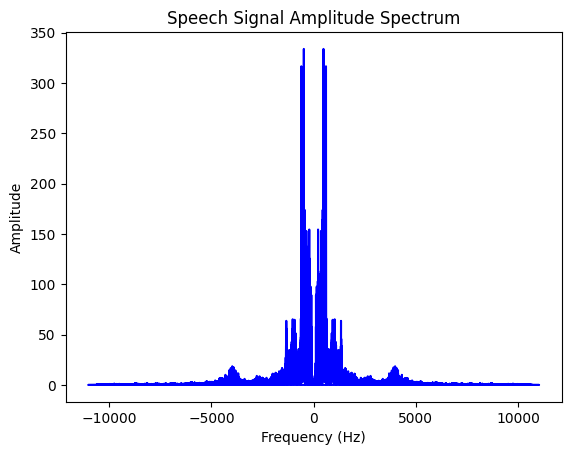

In [17]:

plt.plot(frequencies, amplitude,color = "blue")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Amplitude Spectrum")
plt.show()

**A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the**  **speech signal from frequency domain to time domain. Compare the generated** **time domain signal with the original signal.**

In [24]:
time_domain = np.fft.ifft(fft_data)
time_domain = time_domain[:len(signal)]


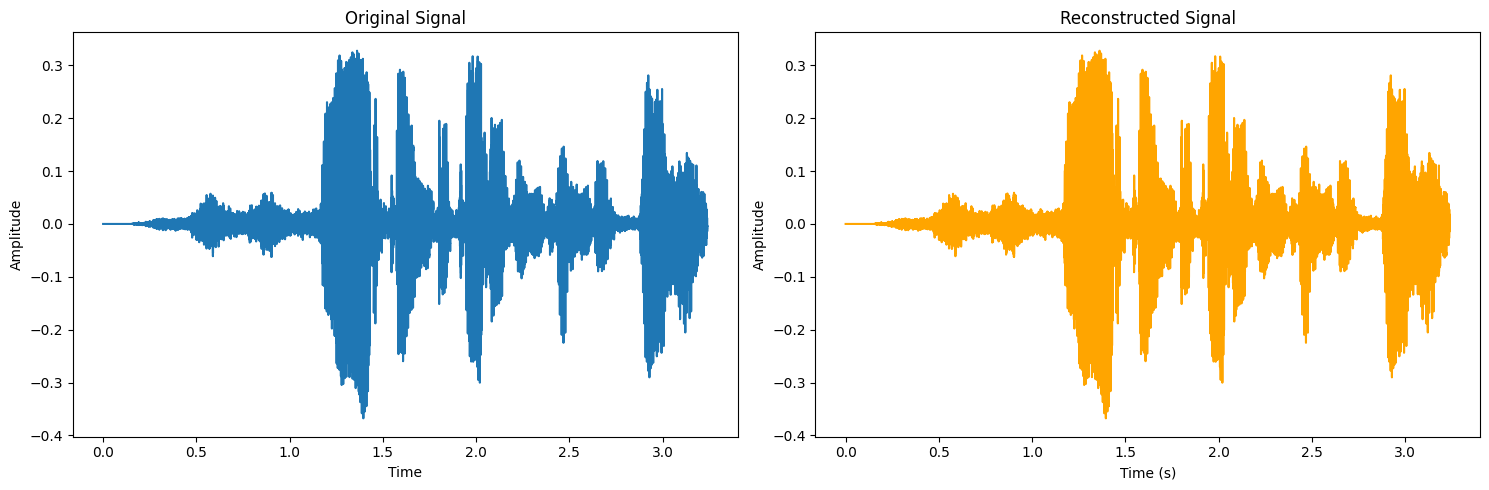

In [31]:
time = np.linspace(0, len(signal)/sr, len(signal))
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time,signal)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original Signal")

plt.subplot(1, 2, 2)
plt.plot(time, time_domain,color = "orange")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Reconstructed Signal")

plt.tight_layout()
plt.show()

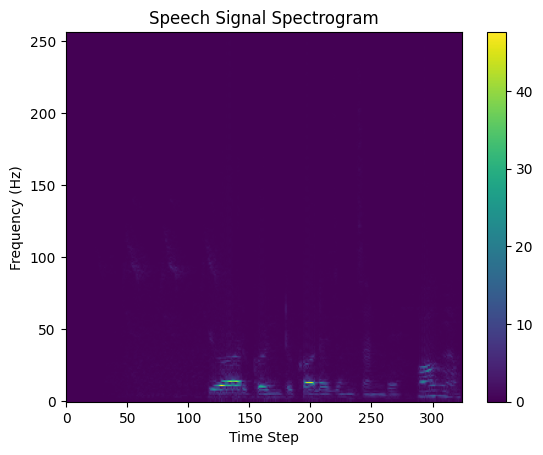

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

signal, sr = librosa.load("statement.mp3")
window_size = int(sr * 0.02)
hop_size = int(window_size / 2)
fft_size = 2 ** int(np.ceil(np.log2(window_size)))
freq_components = np.zeros((fft_size // 2 + 1, int(np.ceil(len(signal) / hop_size))))
for i in range(0, len(signal) - window_size + 1, hop_size):
    window = signal[i:i + window_size]
    padded_window = np.pad(window, (0, fft_size - len(window)), mode="constant")
    fft_result = np.fft.rfft(padded_window)
    freq_components[:, i // hop_size] = np.abs(fft_result[:fft_size // 2 + 1])  # Keep positive frequencies

plt.imshow(freq_components, aspect="auto", origin="lower")
plt.xlabel("Time Step")
plt.ylabel("Frequency (Hz)")
plt.title("Speech Signal Spectrogram")
plt.colorbar()
plt.show()
